<a href="https://colab.research.google.com/github/ramirezzzluisss/pythonprojects/blob/main/SuperBowlTweetsWordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superbowl Tweets WordCloud Project


In [2]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/Twitter_dataset.csv', encoding='latin1')

print (df)

Mounted at /content/gdrive
      Unnamed: 0                       _id                      created_at  \
0              0  6020fc7e9e1aa8e3e7ad0832  Mon Feb 08 04:29:58 +0000 2021   
1              1  6020fc7e9e1aa8e3e7ad0833  Mon Feb 08 04:29:55 +0000 2021   
2              2  6020fc7e9e1aa8e3e7ad0834  Mon Feb 08 04:29:48 +0000 2021   
3              3  6020fc7e9e1aa8e3e7ad0835  Mon Feb 08 04:29:43 +0000 2021   
4              4  6020fc7e9e1aa8e3e7ad0836  Mon Feb 08 04:29:42 +0000 2021   
...          ...                       ...                             ...   
9751           3  6020fbb89e1aa8e3e7ac0a78  Mon Feb 08 02:01:58 +0000 2021   
9752           4  6020fbb89e1aa8e3e7ac0a79  Mon Feb 08 01:00:24 +0000 2021   
9753           5  6020fbb89e1aa8e3e7ac0a7a  Sun Feb 07 23:44:20 +0000 2021   
9754           6  6020fbb89e1aa8e3e7ac0a7b  Sun Feb 07 23:33:40 +0000 2021   
9755           7  6020fbb89e1aa8e3e7ac0a7c  Sun Feb 07 23:32:32 +0000 2021   

                id               id_

In [5]:
#look at the top rows
df.head(10) 

,Unnamed: 0,_id,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,...,matching_rules,retweeted_status,extended_tweet,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,scopes
0,0,6020fc7e9e1aa8e3e7ad0832,Mon Feb 08 04:29:58 +0000 2021,1.358630e+18,1358634152719839233,@Rebe_Charizard ?????????????????????m(*_ _)m,"[16, 45]","<a href=""http://twitter.com/download/iphone"" r...",False,1.358630e+18,...,[{'tag': None}],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,6020fc7e9e1aa8e3e7ad0833,Mon Feb 08 04:29:55 +0000 2021,1.358630e+18,1358634138639605762,"RT @iiiRatcha: ????????????????????""??????????...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,...,[{'tag': None}],{'created_at': 'Sun Feb 07 15:23:25 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,6020fc7e9e1aa8e3e7ad0834,Mon Feb 08 04:29:48 +0000 2021,1.358630e+18,1358634110600826880,@kashDAI not you listening to cfm and m&amp;m ...,"[9, 140]","<a href=""http://twitter.com/download/iphone"" r...",True,1.358630e+18,...,[{'tag': None}],NaN,{'full_text': '@kashDAI not you listening to c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,6020fc7e9e1aa8e3e7ad0835,Mon Feb 08 04:29:43 +0000 2021,1.358630e+18,1358634090350583809,RT @_soniashenoy: M&amp;M says \nSsangyong dea...,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,...,[{'tag': None}],{'created_at': 'Fri Feb 05 08:32:11 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,6020fc7e9e1aa8e3e7ad0836,Mon Feb 08 04:29:42 +0000 2021,1.358630e+18,1358634084537352192,RT @mmschocolate: This year?s #SuperBowlLV com...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,...,[{'tag': None}],{'created_at': 'Wed Feb 03 15:06:02 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,6020fc7e9e1aa8e3e7ad0837,Mon Feb 08 04:29:40 +0000 2021,1.358630e+18,1358634077046272000,RT @Tezhwa: ?????????????????????????????? ???...,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,...,[{'tag': None}],{'created_at': 'Sun Feb 07 14:46:14 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,6020fc7e9e1aa8e3e7ad0838,Mon Feb 08 04:29:40 +0000 2021,1.358630e+18,1358634076194959362,RT @HAIKYUUFESS: *hq contains m/m ushioi // cr...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,...,[{'tag': None}],{'created_at': 'Sun Feb 07 14:50:59 +0000 2021...,NaN,"{'media': [{'id': 1358428041433681920, 'id_str...",False,NaN,NaN,NaN,NaN,NaN
7,7,6020fc7e9e1aa8e3e7ad0839,Mon Feb 08 04:29:37 +0000 2021,1.358630e+18,1358634061758046210,@iDeepanshu_k @MrPiiyush @s_u_m_m_y_ @akshay_M...,"[111, 140]","<a href=""http://twitter.com/download/android"" ...",False,1.358630e+18,...,[{'tag': None}],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,6020fc7e9e1aa8e3e7ad083a,Mon Feb 08 04:29:36 +0000 2021,1.358630e+18,1358634060369829888,"La neta nunca le he entendido al americano, tu...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",True,NaN,...,[{'tag': None}],NaN,{'full_text': 'La neta nunca le he entendido a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,6020fc7e9e1aa8e3e7ad083b,Mon Feb 08 04:29:35 +0000 2021,1.358630e+18,1358634054694825985,RT @Tezhwa: ?????????????????????????????? ???...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,...,[{'tag': None}],{'created_at': 'Sun Feb 07 14:46:14 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#look at last rows
df.tail(10) 

,Unnamed: 0,_id,created_at,id,id_str,text,display_text_range,source,truncated,in_reply_to_status_id,...,matching_rules,retweeted_status,extended_tweet,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,scopes
9746,120,6020fbb69e1aa8e3e7ac0706,Sun Feb 07 23:34:29 +0000 2021,1.358560e+18,1358559791292047360,@nbcsnl @danjlevy @danlevy - sad that my life ...,"[18, 92]","<a href=""https://mobile.twitter.com"" rel=""nofo...",False,1.358280e+18,...,[{'tag': None}],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9747,121,6020fbb69e1aa8e3e7ac0707,Sun Feb 07 23:30:04 +0000 2021,1.358560e+18,1358558680879296512,@soccermom0605 @JustinTrudeau @danjlevy @nbcsn...,"[57, 140]","<a href=""http://twitter.com/download/iphone"" r...",True,1.358540e+18,...,[{'tag': None}],NaN,{'full_text': '@soccermom0605 @JustinTrudeau @...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9748,0,6020fbb89e1aa8e3e7ac0a75,Mon Feb 08 03:16:33 +0000 2021,1.358620e+18,1358615674147528704,Hey @BlueJays are you ready to play ball since...,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",False,NaN,...,[{'tag': None}],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9749,1,6020fbb89e1aa8e3e7ac0a76,Mon Feb 08 02:04:19 +0000 2021,1.358600e+18,1358597495182348290,RT @lakeprincess22: A 5-second ad that felt li...,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,...,[{'tag': None}],{'created_at': 'Mon Feb 08 02:01:58 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9750,2,6020fbb89e1aa8e3e7ac0a77,Mon Feb 08 02:03:07 +0000 2021,1.358600e+18,1358597193456877574,RT @lakeprincess22: A 5-second ad that felt li...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,...,[{'tag': None}],{'created_at': 'Mon Feb 08 02:01:58 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9751,3,6020fbb89e1aa8e3e7ac0a78,Mon Feb 08 02:01:58 +0000 2021,1.358600e+18,1358596905886863363,A 5-second ad that felt like a subliminal mess...,"[0, 140]","<a href=""http://twitter.com/download/android"" ...",True,NaN,...,[{'tag': None}],NaN,{'full_text': 'A 5-second ad that felt like a ...,NaN,False,NaN,NaN,NaN,NaN,NaN
9752,4,6020fbb89e1aa8e3e7ac0a79,Mon Feb 08 01:00:24 +0000 2021,1.358580e+18,1358581411008102402,RT @anygabrielly: Si quieres yo me quedo pa ot...,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,...,[{'tag': None}],{'created_at': 'Wed Jul 22 21:17:48 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9753,5,6020fbb89e1aa8e3e7ac0a7a,Sun Feb 07 23:44:20 +0000 2021,1.358560e+18,1358562270763122689,I wonder if these Super Bowl messages of unity...,NaN,"<a href=""http://twitter.com/download/android"" ...",False,NaN,...,[{'tag': None}],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9754,6,6020fbb89e1aa8e3e7ac0a7b,Sun Feb 07 23:33:40 +0000 2021,1.358560e+18,1358559585804693513,RT @DrunkUncTony: Joe Biden's america #Unity #...,NaN,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",False,NaN,...,[{'tag': None}],{'created_at': 'Sun Feb 07 23:28:35 +0000 2021...,NaN,NaN,True,1.358560e+18,1.358558e+18,{'created_at': 'Sun Feb 07 23:26:46 +0000 2021...,"{'url': 'https://t.co/St6rKn438s', 'expanded':...",NaN
9755,7,6020fbb89e1aa8e3e7ac0a7c,Sun Feb 07 23:32:32 +0000 2021,1.358560e+18,1358559299946106883,This should be our National Anthem for 2021!\n...,"[0, 140]","<a href=""https://mobile.twitter.com"" rel=""nofo...",True,NaN,...,[{'tag': None}],NaN,{'full_text': 'This should be our National Ant...,NaN,False,NaN,NaN,NaN,NaN,NaN


In [7]:
#get a summary of the dataset
df.describe()

,Unnamed: 0,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,contributors,quote_count,reply_count,retweet_count,favorite_count,quoted_status_id,quoted_status_id_str
count,9756.000000,9.756000e+03,9.756000e+03,2.863000e+03,2.863000e+03,2.985000e+03,2.985000e+03,0.0,9756.000000,9756.000000,9756.000000,9756.000000,2.400000e+02,2.400000e+02
mean,4749.132226,1.358590e+18,1.358590e+18,1.357976e+18,1.357976e+18,7.661037e+17,7.661036e+17,NaN,0.024395,0.289565,0.187577,1.862854,1.351627e+18,1.351627e+18
std,2813.702919,2.346799e+13,2.281055e+13,1.813591e+16,1.813591e+16,5.781080e+17,5.781079e+17,NaN,0.248871,1.934631,3.435467,31.547737,5.209077e+16,5.209088e+16
min,0.000000,1.358560e+18,1.358559e+18,4.475270e+17,4.475267e+17,2.682300e+04,2.682300e+04,NaN,0.000000,0.000000,0.000000,0.000000,8.165590e+17,8.165588e+17
25%,2308.750000,1.358570e+18,1.358567e+18,1.358560e+18,1.358558e+18,1.399829e+09,1.399829e+09,NaN,0.000000,0.000000,0.000000,0.000000,1.358278e+18,1.358279e+18
50%,4747.500000,1.358590e+18,1.358587e+18,1.358580e+18,1.358576e+18,1.041530e+18,1.041529e+18,NaN,0.000000,0.000000,0.000000,0.000000,1.358545e+18,1.358544e+18
75%,7186.250000,1.358610e+18,1.358610e+18,1.358600e+18,1.358600e+18,1.284830e+18,1.284832e+18,NaN,0.000000,0.000000,0.000000,1.000000,1.358580e+18,1.358579e+18
max,9625.000000,1.358630e+18,1.358634e+18,1.358630e+18,1.358634e+18,1.358610e+18,1.358606e+18,NaN,12.000000,87.000000,264.000000,2830.000000,1.358630e+18,1.358633e+18


In [8]:
#look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9756 entries, 0 to 9755
Data columns (total 39 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 9756 non-null   int64  
 1   _id                        9756 non-null   object 
 2   created_at                 9756 non-null   object 
 3   id                         9756 non-null   float64
 4   id_str                     9756 non-null   int64  
 5   text                       9756 non-null   object 
 6   display_text_range         3222 non-null   object 
 7   source                     9747 non-null   object 
 8   truncated                  9756 non-null   bool   
 9   in_reply_to_status_id      2863 non-null   float64
 10  in_reply_to_status_id_str  2863 non-null   float64
 11  in_reply_to_user_id        2985 non-null   float64
 12  in_reply_to_user_id_str    2985 non-null   float64
 13  in_reply_to_screen_name    2985 non-null   objec

Clean up the data
Did you notice anything unusual about the "house" amounts? 

How about the handset price and income?

In [9]:
# clean rows in dataframe with more than 5 questions marks '?????' in text
df_clean = df[(df["text"].str.contains("\?\?\?\?\?")==False)]

# clean columns in data frame
df_clean = df_clean[['created_at','id_str','text','source','user','retweet_count','favorite_count','extended_tweet']]

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 2 to 9755
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created_at      4980 non-null   object
 1   id_str          4980 non-null   int64 
 2   text            4980 non-null   object
 3   source          4979 non-null   object
 4   user            4980 non-null   object
 5   retweet_count   4980 non-null   int64 
 6   favorite_count  4980 non-null   int64 
 7   extended_tweet  696 non-null    object
dtypes: int64(3), object(5)
memory usage: 350.2+ KB


In [10]:
df_clean.head(20)

,created_at,id_str,text,source,user,retweet_count,favorite_count,extended_tweet
2,Mon Feb 08 04:29:48 +0000 2021,1358634110600826880,@kashDAI not you listening to cfm and m&amp;m ...,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 1034197390780190720, 'id_str': '1034197...",0,0,{'full_text': '@kashDAI not you listening to c...
3,Mon Feb 08 04:29:43 +0000 2021,1358634090350583809,RT @_soniashenoy: M&amp;M says \nSsangyong dea...,"<a href=""https://mobile.twitter.com"" rel=""nofo...","{'id': 607680568, 'id_str': '607680568', 'name...",0,0,NaN
4,Mon Feb 08 04:29:42 +0000 2021,1358634084537352192,RT @mmschocolate: This year?s #SuperBowlLV com...,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 80744833, 'id_str': '80744833', 'name':...",0,0,NaN
6,Mon Feb 08 04:29:40 +0000 2021,1358634076194959362,RT @HAIKYUUFESS: *hq contains m/m ushioi // cr...,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 1350919781491339264, 'id_str': '1350919...",0,0,NaN
7,Mon Feb 08 04:29:37 +0000 2021,1358634061758046210,@iDeepanshu_k @MrPiiyush @s_u_m_m_y_ @akshay_M...,"<a href=""http://twitter.com/download/android"" ...","{'id': 1283776534348591107, 'id_str': '1283776...",0,1,NaN
8,Mon Feb 08 04:29:36 +0000 2021,1358634060369829888,"La neta nunca le he entendido al americano, tu...","<a href=""http://twitter.com/download/iphone"" r...","{'id': 260492158, 'id_str': '260492158', 'name...",0,0,{'full_text': 'La neta nunca le he entendido a...
10,Mon Feb 08 04:29:34 +0000 2021,1358634052329242625,@u_m_m_m_m_m_m ?? ?? ???.,"<a href=""http://twitter.com/download/android"" ...","{'id': 1340957211892203521, 'id_str': '1340957...",0,0,NaN
12,Mon Feb 08 04:29:33 +0000 2021,1358634047044530177,RT @frog_bich123: white chocolate m&amp;m http...,"<a href=""http://twitter.com/download/iphone"" r...","{'id': 1346959681441443841, 'id_str': '1346959...",0,0,NaN
13,Mon Feb 08 04:29:30 +0000 2021,1358634033295462401,RT @HAIKYUUFESS: *hq contains m/m pair bokuaka...,"<a href=""http://twitter.com/download/android"" ...","{'id': 966632978305703936, 'id_str': '96663297...",0,0,NaN
14,Mon Feb 08 04:29:26 +0000 2021,1358634015247355905,"RT @HAIKYUUFESS: *hq contains m/m pair iwaoi ,...","<a href=""http://twitter.com/download/android"" ...","{'id': 966632978305703936, 'id_str': '96663297...",0,0,NaN


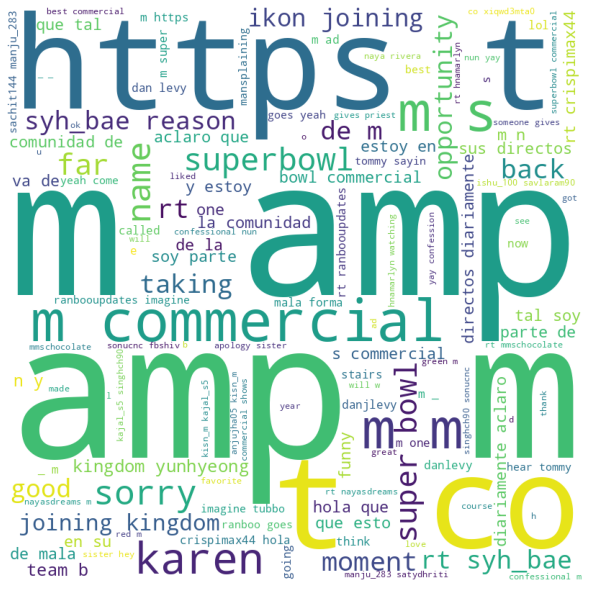

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Word Cloud Analysis for text
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df_clean.text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

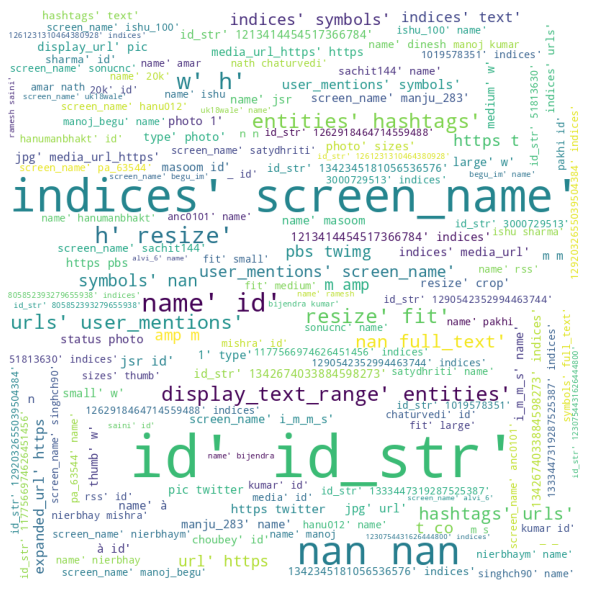

In [12]:
# analysis 2

# Word Cloud Analysis for extended_tweet
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df_clean.extended_tweet:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()